In [135]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import csv
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

filename_0 = 'submission_feature2wordvec_nouns_without_tags_origin_top50.csv'
filename_1 = 'submission_v1_modified.csv'

lines_0 = []
with open(filename_0) as f:
    reader = csv.reader(f)
    first_line = next(reader)
    for line in reader:
        lines_0.append(line)
        
lines_1 = []
with open(filename_1) as f:
    reader = csv.reader(f)
    first_line = next(reader)
    for line in reader:
        lines_1.append(line)
        
    
descriptions_test_dir = 'data/descriptions_test/'
features_test_dir = 'data/features_test/'
images_test_dir = 'data/images_test/'
tags_test_dir = 'data/tags_test/'

def read_test_example(n):
    print('Tags:')
    tags_test_file = open(tags_test_dir + str(n) + '.txt', 'r') 
    print(tags_test_file.read())
    
    
def show(i):
    print('Candidates:')
    line = lines[i]
    indices = line[1].split()
    
    k = 1
    for index in indices:
        j = int(index.split('.')[0])
        read_test_example(j)
        im = imageio.imread(images_test_dir + str(j) + '.jpg')
        plt.title(str(k - 1))
        plt.subplot(4, 5, k)
        plt.imshow(im)
        k += 1
    print('Descriptions:')
    descriptions_test_file = open(descriptions_test_dir + str(i) + '.txt', 'r') 
    print(descriptions_test_file.read())

def show_both(i):
    print('Descriptions:')
    descriptions_test_file = open(descriptions_test_dir + str(i) + '.txt', 'r') 
    print(descriptions_test_file.read())
    
    line = lines_0[i]
    indices = line[1].split()
    k = 1
    for index in indices:
        j = int(index.split('.')[0])
        im = imageio.imread(images_test_dir + str(j) + '.jpg')
        plt.xticks([])
        plt.yticks([])
        plt.subplot(8, 5, k)
        plt.imshow(im)
        plt.title(str(j))
        k += 1
        
    line = lines_1[i]
    indices = line[1].split()
    
    for index in indices:
        j = int(index.split('.')[0])
        im = imageio.imread(images_test_dir + str(j) + '.jpg')
        plt.xticks([])
        plt.yticks([])
        plt.subplot(8, 5, k)
        plt.imshow(im)
        plt.title(str(j))
        k += 1

Descriptions:
A large slice of angel food cake sitting on top of a plate.
A small plate contains a large slice of cake. 
A quarter of a cake on a plate
A large piece of yellow cake sits on a plate.
A large slab of sponge cake sits upon a flowery plate.



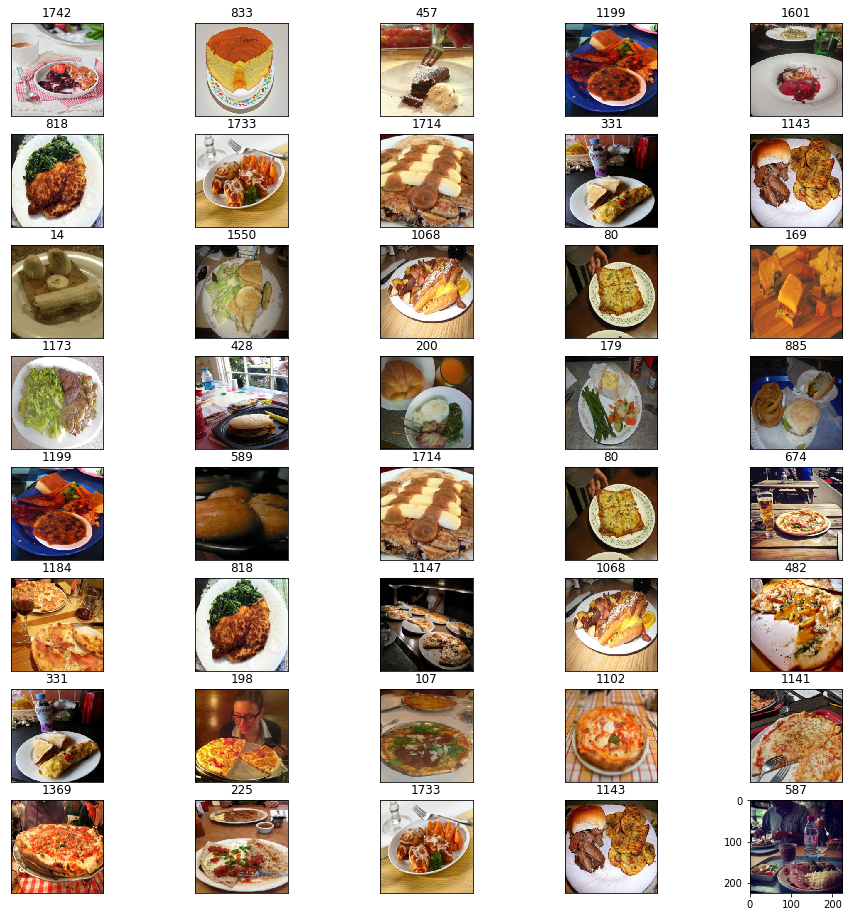

In [474]:
show_both(1)

Descriptions:
this is a street with a brick building
a building with a sign and a street right outside
Black and white image of an empty street. 
a old building that is next to a street
A black and white picture of a building

Tags:
vehicle:car
person:person



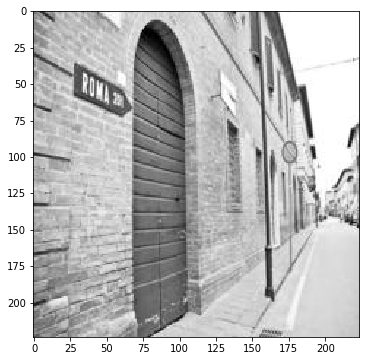

In [363]:
# prepare libraries & data

import matplotlib.pyplot as plt
import numpy as np
import imageio
import csv
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

descriptions_train_dir = 'data/descriptions_train/'
features_train_dir = 'data/features_train/'
images_train_dir = 'data/images_train/'
tags_train_dir = 'data/tags_train/'

def read_example(n):
    print('Descriptions:')
    descriptions_train_file = open(descriptions_train_dir + str(n) + '.txt', 'r') 
    print(descriptions_train_file.read())
    
    print('Tags:')
    tags_train_file = open(tags_train_dir + str(n) + '.txt', 'r') 
    print(tags_train_file.read())
    
    im = imageio.imread(images_train_dir + str(n) + '.jpg')
    plt.imshow(im)

# for i in range(200,400):
read_example(8)

In [370]:
# merge results
test_size = 2000

res = []
for i in range(test_size):
    cur_res = {}

    line = lines_0[i]
    indices = line[1].split()
    rank = 1.0
    for index in indices:
        j = int(index.split('.')[0])
        if j in cur_res:
            cur_res[j] -= 20.5 - rank * 1.2
        else:
            cur_res[j] = -(21.5 - rank * 1.2)
        rank += 1.0
        
    line = lines_1[i]
    indices = line[1].split()
    rank = 1.0
    for index in indices:
        j = int(index.split('.')[0])
        if j in cur_res:
            cur_res[j] -= 20.0 - rank
        else:
            cur_res[j] = -(21.0 - rank)
        rank += 1.0
    
    sorted_by_value = sorted(cur_res.items(), key=lambda kv: kv[1])
    keys = []
    for s in sorted_by_value:
        keys.append(s[0])
    res.append(keys[:20])
        
output_filename = 'submission_merged_new.csv'
with open(output_filename, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Descritpion_ID","Top_20_Image_IDs"])
    for i in range(test_size):
        row = []
        row.append(str(i) + '.txt')
        candids = []
        for candid in res[i]:
            candids.append(str(candid) + '.jpg')
        row.append(' '.join(candids))
        writer.writerow(row)

In [407]:
rcParams['figure.figsize'] = 16,16

filename = 'submission_merged.csv'

lines = []
with open(filename) as f:
    reader = csv.reader(f)
    first_line = next(reader)
    for line in reader:
        lines.append(line)

def show_result(i):
    print('Descriptions:')
    descriptions_test_file = open(descriptions_test_dir + str(i) + '.txt', 'r') 
    print(descriptions_test_file.read())
    
    line = lines[i]
    indices = line[1].split()
    k = 1
    for index in indices:
        j = int(index.split('.')[0])
        im = imageio.imread(images_test_dir + str(j) + '.jpg')
        ax = plt.subplot(4, 5, k)
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
        plt.subplots_adjust(wspace=0.1, hspace=0)
        
        ax.set_xticklabels(())
        ax.title.set_visible(False)
        
        k += 1

Descriptions:
a close up of a bench with a dog laying on the ground
A tan dog laying next to a park bench.
A brown dog laying on a concrete sidewalk.
A brown dog is laying by a bench.
A large brown dog laying on the floor next to a wooden bench.



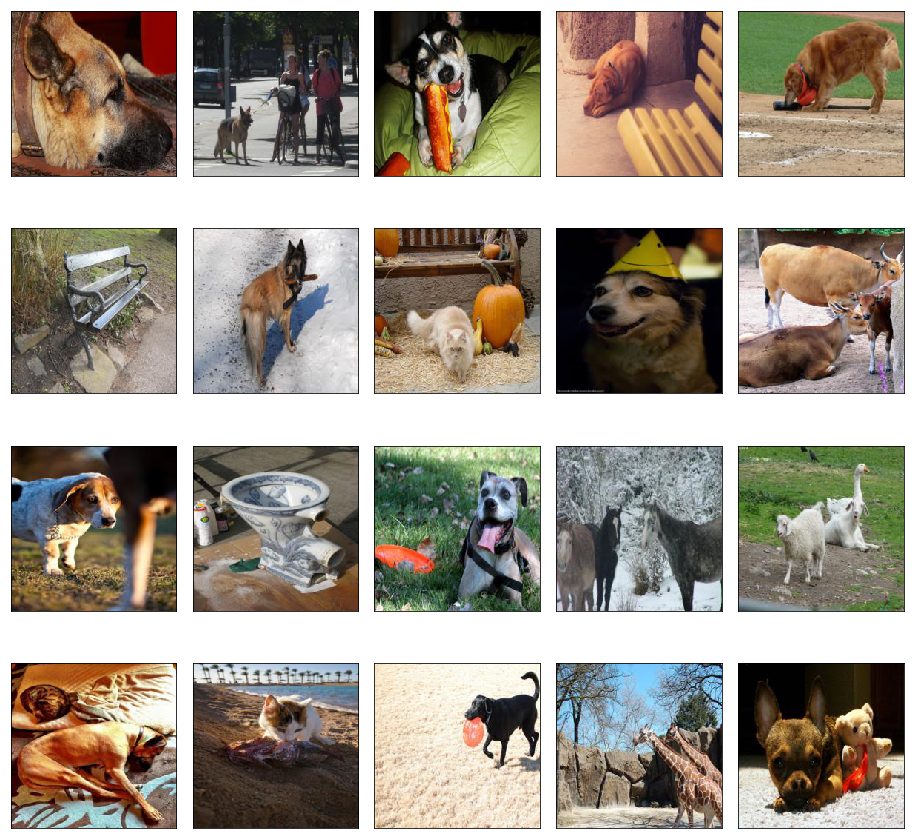

In [473]:
show_result(203)